# Parameters `width_unit`/`height_unit`

In [1]:
from math import sqrt

import pandas as pd

from lets_plot import *


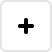
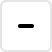
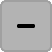
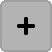
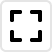
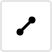
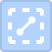
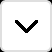
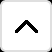
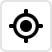
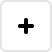
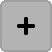
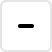
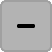
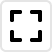
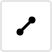
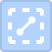
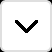
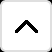
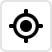

In [2]:
LetsPlot.setup_html()

## `geom_errorbar()`

### [Issue #1288](https://github.com/JetBrains/lets-plot/issues/1288) - Allow absolute width for geom_errorbar (and possibly others)

In [3]:
def get_errorbar_data():
    n = 16
    xs = [2 * i for i in range(n)]
    return pd.DataFrame({
        'x': xs,
        'ymin': [i % 4 for i in range(n)],
        'ymax': [i % 4 + 2.5 for i in range(n)],
        'width_px': [10 * (i % 4 + 1) for i in range(n)]
    })

errorbar16_df = get_errorbar_data()
errorbar4_df = errorbar16_df.iloc[:4]

In [4]:
def get_errorbar_plot(df, width=None, width_unit=None):
    cat_size = len(df['x'].unique())
    return ggplot(df) + \
        geom_errorbar(aes(x='x', ymin='ymin', ymax='ymax'),
                      width=width, width_unit=width_unit) + \
        ggtitle("categories count: {0}\nwidth={1}, width_unit={2}".format(
            cat_size, width, width_unit
        ))

In [5]:
gggrid([
    get_errorbar_plot(errorbar16_df, width=.5),
    get_errorbar_plot(errorbar4_df, width=.5),
    get_errorbar_plot(errorbar16_df, width=5, width_unit='size'),
    get_errorbar_plot(errorbar4_df, width=5, width_unit='size'),
], ncol=2)

### Additional tests

In [6]:
gggrid([
    ggplot(errorbar4_df) + \
        geom_errorbar(aes(x='x', ymin='ymin', ymax='ymax', width='width_px'), width_unit='px') + \
        coord_cartesian(xlim=[-1, 7]) + \
        ggtitle("Mapped width (px)"),
    ggplot(errorbar4_df) + \
        geom_errorbar(aes(x='x', ymin='ymin', ymax='ymax'), width_unit='px', width=30) + \
        coord_cartesian(xlim=[-1, 7]) + \
        ggtitle("Constant width (30 px)"),
    ggplot(errorbar4_df) + \
        geom_errorbar(aes(y='x', xmin='ymin', xmax='ymax'), height_unit='px', height=30) + \
        coord_cartesian(ylim=[-1, 7]) + \
        ggtitle("Constant width (30 px)", "orientation='y'"),
    ggplot(errorbar4_df) + \
        geom_errorbar(aes(x='x', ymin='ymin', ymax='ymax'), width_unit='res', width=1) + \
        coord_cartesian(xlim=[-1, 7]) + \
        ggtitle("Constant width (1 res)"),
    ggplot(errorbar4_df) + \
        geom_errorbar(aes(x='x', ymin='ymin', ymax='ymax'), width_unit='identity', width=2) + \
        coord_cartesian(xlim=[-1, 7]) + \
        ggtitle("Constant width (2 identity = 2 axis units)"),
    ggplot(errorbar4_df) + \
        geom_point(aes(x='x', y='ymax'), size=12, color="lightgray") + \
        geom_errorbar(aes(x='x', ymin='ymin', ymax='ymax'), width_unit='size', width=12) + \
        coord_cartesian(xlim=[-1, 7]) + \
        ggtitle("Constant width (12 sizes = point of size 12)"),
], ncol=2)

In [7]:
def get_errorbar_test_plot(width, width_unit, coord):
    coord_dict = {k: v for k, v in coord.as_dict().items() if k not in ["xlim", "ylim"]}
    p = ggplot(errorbar4_df) + \
        geom_errorbar(aes(x='x', ymin='ymin', ymax='ymax'), width_unit=width_unit, width=width) + \
        coord + \
        ggtitle("width={w}, width_unit={wu}\n\ncoord={c}".format(
            w=width,
            wu=width_unit,
            c=coord_dict
        ))
    if width_unit == 'size':
        p += geom_point(aes(x='x', y='ymax'), size=12, color="gray", alpha=.25)
    return p

plots = []
xlim, ylim = [-2, 8], [-.5, 6]
for width, width_unit in [(1, 'res'), (2, 'identity'), (50, 'px'), (12, 'size')]:
    for coord in [
        coord_cartesian(xlim=xlim, ylim=ylim),
        coord_fixed(ratio=.5, xlim=xlim, ylim=ylim),
        coord_flip(xlim=xlim, ylim=ylim),
    ]:
        plots.append(get_errorbar_test_plot(width, width_unit, coord))

gggrid(plots, ncol=2) + ggsize(800, 2400)

## `geom_tile()`

### Custom `width` with `'identity'` stat

Suppose we have the following hand-calculated statistics for `binwidth=[4, 4]`:

In [8]:
tile_stat_data = {
    'x': [2,  2, 6, 10, 10],
    'y': [2, 10, 2,  2, 10],
    'mean': [1.2, 1.8, 0.8, 1.2, 0.6],
    'width_px': [20, 30, 40, 50, 60],
    'height_px': [20, 30, 40, 50, 60],
}

And we want to plot this data using `geom_tile()` (or `geom_bin2d(stat='identity')`):

In [9]:
def get_tile_plot(width=None, height=None, width_unit=None, height_unit=None):
    return ggplot(tile_stat_data, aes('x', 'y')) + \
        geom_tile(aes(fill='mean'), width=width, height=height,
                  width_unit=width_unit, height_unit=height_unit) + \
        ggtitle("Supposed binwidth: [4, 4]\nwidth={w}, width_unit={wu}\nheight={h}, height_unit={hu}".format(
            w=width, wu=width_unit,
            h=height, hu=height_unit,
        ))

In [10]:
gggrid([
    get_tile_plot(),
    get_tile_plot(width=1, height=.5),
    get_tile_plot(width=4, height=4, width_unit='identity', height_unit='identity'),
], ncol=3)

### Additional tests

In [11]:
gggrid([
    ggplot(tile_stat_data, aes('x', 'y')) + \
        geom_tile(aes(fill='mean', width='width_px', height='height_px'),
                  width_unit='px', height_unit='px') + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Mapped width and height (px)"),
    ggplot(tile_stat_data, aes('x', 'y')) + \
        geom_tile(aes(fill='mean'),
                  width=60, height=60,
                  width_unit='px', height_unit='px') + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Constant width and height (60 px)"),
    ggplot(tile_stat_data, aes('x', 'y')) + \
        geom_tile(aes(fill='mean'),
                  width=1, height=1,
                  width_unit='res', height_unit='res') + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Constant width and height (1 res)"),
    ggplot(tile_stat_data, aes('x', 'y')) + \
        geom_tile(aes(fill='mean'),
                  width=3, height=3,
                  width_unit='identity', height_unit='identity') + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Constant width and height (3 identity = 3 axis units)"),
    ggplot(tile_stat_data, aes('x', 'y')) + \
        geom_tile(aes(fill='mean'),
                  width=20, height=20,
                  width_unit='size', height_unit='size') + \
        geom_point(color='gray', size=20) + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Constant width and height (20 sizes = point of size 20)"),
], ncol=2)

In [12]:
def get_tile_test_plot(width, height, width_unit, height_unit, coord):
    coord_dict = {k: v for k, v in coord.as_dict().items() if k not in ["xlim", "ylim"]}
    return ggplot(tile_stat_data, aes('x', 'y')) + \
        geom_tile(aes(fill='mean'),
                  width_unit=width_unit, height_unit=height_unit,
                  width=width, height=height) + \
        geom_point(size=12, color="lightgray") + \
        coord + \
        ggtitle("width={w}, width_unit={wu}\nheight={h}, height_unit={hu}\n\ncoord={c}".format(
            w=width,
            wu=width_unit,
            h=height,
            hu=height_unit,
            c=coord_dict
        ))

plots = []
xlim, ylim = [-1, 13], [-3, 15]
for dim, dim_unit in [(1, 'res'), (3, 'identity'), (50, 'px'), (12, 'size')]:
    for coord in [
        coord_cartesian(xlim=xlim, ylim=ylim),
        coord_fixed(ratio=.5, xlim=xlim, ylim=ylim),
        coord_flip(xlim=xlim, ylim=ylim),
    ]:
        plots.append(get_tile_test_plot(dim, dim, dim_unit, dim_unit, coord))

gggrid(plots, ncol=2) + ggsize(800, 2400)

## `geom_hex()`

In [13]:
hex_stat_data = {
    'x': [2,  2, 6, 10, 10],
    'y': [v * sqrt(3.0) / 2.0 for v in [2, 10, 2,  2, 10]],
    'v': [1.2, 1.8, 0.8, 1.2, 0.6],
    'width_px': [20, 30, 40, 50, 60],
    'height_px': [20, 30, 40, 50, 60],
}

In [14]:
gggrid([
    ggplot(hex_stat_data, aes('x', 'y')) + \
        geom_hex(aes(fill='v', width='width_px', height='height_px'),
                 stat='identity',
                 width_unit='px', height_unit='px') + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Mapped width and height (px)"),
    ggplot(hex_stat_data, aes('x', 'y')) + \
        geom_hex(aes(fill='v'),
                 stat='identity',
                 width=60, height=60,
                 width_unit='px', height_unit='px') + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Constant width and height (60 px)"),
    ggplot(hex_stat_data, aes('x', 'y')) + \
        geom_hex(aes(fill='v'),
                 stat='identity',
                 width=1, height=1,
                 width_unit='res', height_unit='res') + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Constant width and height (1 res)"),
    ggplot(hex_stat_data, aes('x', 'y')) + \
        geom_hex(aes(fill='v'),
                 stat='identity',
                 width=4, height=4,
                 width_unit='identity', height_unit='identity') + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Constant width and height (4 identity = 4 axis units)"),
    ggplot(hex_stat_data, aes('x', 'y')) + \
        geom_hex(aes(fill='v'),
                 stat='identity',
                 width=20, height=20,
                 width_unit='size', height_unit='size') + \
        geom_point(color='gray', size=20) + \
        coord_fixed(xlim=[-1, 13], ylim=[-1, 13]) + \
        ggtitle("Constant width and height (20 sizes = point of size 20)"),
], ncol=2)

In [15]:
def get_hex_test_plot(width, height, width_unit, height_unit, coord):
    coord_dict = {k: v for k, v in coord.as_dict().items() if k not in ["xlim", "ylim"]}
    return ggplot(hex_stat_data, aes('x', 'y')) + \
        geom_hex(aes(fill='v'),
                 stat='identity',
                 width_unit=width_unit, height_unit=height_unit,
                 width=width, height=height) + \
        geom_point(size=12, color="lightgray") + \
        coord + \
        ggtitle("width={w}, width_unit={wu}\nheight={h}, height_unit={hu}\n\ncoord={c}".format(
            w=width,
            wu=width_unit,
            h=height,
            hu=height_unit,
            c=coord_dict
        ))

plots = []
xlim, ylim = [-1, 13], [-3, 15]
for dim, dim_unit in [(1, 'res'), (4, 'identity'), (50, 'px'), (12, 'size')]:
    for coord in [
        coord_cartesian(xlim=xlim, ylim=ylim),
        coord_fixed(ratio=.5, xlim=xlim, ylim=ylim),
        coord_flip(xlim=xlim, ylim=ylim),
    ]:
        plots.append(get_hex_test_plot(dim, dim, dim_unit, dim_unit, coord))

gggrid(plots, ncol=2) + ggsize(800, 2400)